Notebook shows galaxy with CG used in CG bias analysis. 
The notebook doesn't show CG bias computations, but provides visuals of galaxies in the analysis.

Three types of galaxies are shown
1. Reference galaxy (parametric)  
   Shows the default bulge+ disk reference galaxy with color gradients im r and i bands.  
   
2. CatSim Galaxy (parametric+ CRG)  
   Shows how to get galaxy from CatSim catalog, and how to use CRG directly instead of using  galsim.RealGalaxyCatalog input  

3. AEGIS galaxy (CRG)  
   Shows to get AEGIS galaxy with galsim.RealGalaxyCatalog and create CRG
   
All galaxies are drawn seen by LSST in the r band (unless told otherwise).
The LSST PSF convolved with the galaxy is the chromatic (size is wavelengtth dependent) LSST PSF with seeing. 

In [1]:
import numpy as np
# from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('legend',**{'fontsize':14})
import os
import galsim
import cg_functions as cg_fn

In [2]:
# plt.rc('font', weight='bold')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)

## Reference Galaxy

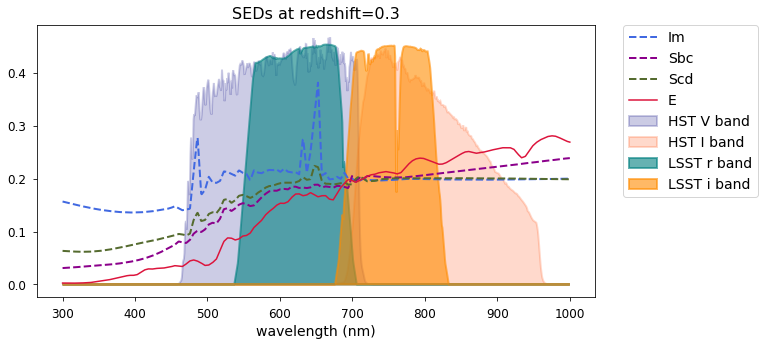

In [6]:
disk_SED_names=['Im', 'Sbc', 'Scd']
colors = ['royalblue', 'darkmagenta', 'darkolivegreen', 'c', 'y', 'm']
x=np.linspace(300,1000,1000)
plt.figure(figsize=[10,5])
V = cg_fn.get_HST_Bandpass('F606W')
I = cg_fn.get_HST_Bandpass('F814W')
filt_r = galsim.Bandpass('data/baseline/total_r.dat',
                        wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass('data/baseline/total_i.dat',
                        wave_type='nm').thin(rel_err=1e-4)
for num, disk_SED_name in enumerate(disk_SED_names):
    in_p = cg_fn.LSST_Args(disk_SED_name=disk_SED_name)
    in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
    
    plt.plot(x,in_p.d_SED(x)*0.2, label=disk_SED_name,linewidth=2,
             c=colors[num], linestyle='--')
plt.plot(x,in_p.b_SED(x)*0.2, c='crimson', label='E')
plt.xlabel('wavelength (nm)', size=14)

plt.title('SEDs at redshift={:.1f}'.format(in_p.redshift), size=16)
plt.fill(x,V(x), alpha=0.2, color='navy', label='HST V band', linewidth=2)
plt.fill(x,I(x), alpha=0.2, color='orangered', label='HST I band',linewidth=2)
plt.fill(x,filt_r(x), alpha=0.6, color='teal', label='LSST r band',linewidth=2)
plt.fill(x,filt_i(x), alpha=0.6, color='Darkorange', label='LSST i band',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [44]:
in_p = cg_fn.LSST_Args()
filt_r = galsim.Bandpass('data/baseline/total_r.dat',
                       wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass('data/baseline/total_i.dat',
                       wave_type='nm').thin(rel_err=1e-4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)
gal = cg_fn.get_gal_cg(in_p)
psf_args = cg_fn.psf_params()
PSF =  cg_fn.get_gaussian_PSF(psf_args)
con = galsim.Convolve([gal, PSF])

true_gal_im_r = gal.drawImage(filt_r, nx=20, ny=20, scale=0.2)
true_gal_im_i = gal.drawImage(filt_i, nx=20, ny=20, scale=0.2)

obs_gal_im_r = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)
obs_gal_im_i = con.drawImage(filt_i, nx=20, ny=20, scale=0.2)

psf_r = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)
psf_i = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_i,
                          scale=0.2, nx=20, ny=20)

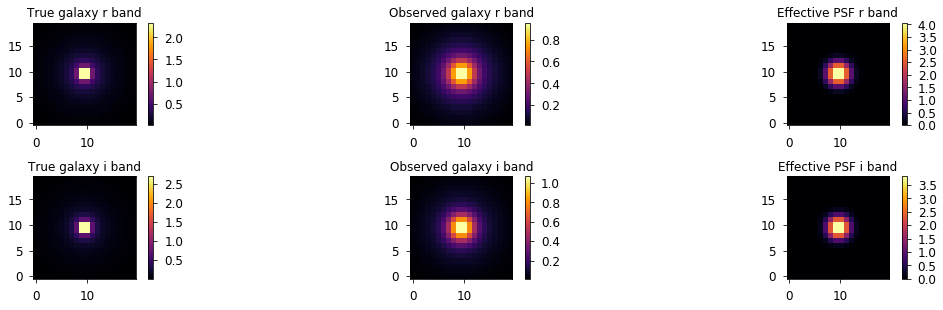

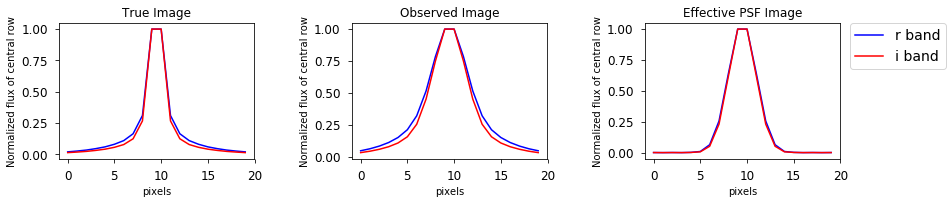

In [45]:
plt.figure(figsize=[18,16])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(6,3,1)
plt.imshow(true_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('True galaxy r band')
plt.subplot(6,3,4)
plt.imshow(true_gal_im_i.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('True galaxy i band')

plt.subplot(6,3,2)
plt.imshow(obs_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Observed galaxy r band')
plt.subplot(6,3,5)
plt.imshow(obs_gal_im_i.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Observed galaxy i band')

plt.subplot(6,3,3)
plt.imshow(psf_r.image.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Effective PSF r band')
plt.subplot(6,3,6)
plt.imshow(psf_i.image.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Effective PSF i band')

plt.figure(figsize=[14,10])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
plt.plot(true_gal_im_r.array[10]/max(true_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(true_gal_im_i.array[10]/max(true_gal_im_i.array[10]), c='r',
         label='i band')
plt.title('True Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,2)
plt.plot(obs_gal_im_r.array[10]/max(obs_gal_im_r.array[10]), c='b',
         label='r band')
plt.plot(obs_gal_im_i.array[10]/max(obs_gal_im_i.array[10]), c='r',
         label='i band')
plt.title('Observed Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,3)
plt.plot(psf_r.image.array[10]/max(psf_r.image.array[10]), c='b',
         label='r band')
plt.plot(psf_i.image.array[10]/max(psf_i.image.array[10]), c='r',
         label='i band')
plt.title('Effective PSF Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## CatSim galaxy

In [3]:
from astropy.table import Table
import catsim_cg_bias as cat_fns

In [4]:
path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/LSST_cat/'
cat_name = path + 'OneDegSq.dat'
cat_all = Table.read(cat_name, format='ascii.basic')

# get galaxies with bulge and disk and i<25.3

cond1 = (cat_all['sedname_disk'] != '-1') & (cat_all['sedname_bulge'] != '-1') & (cat_all['sedname_agn'] == '-1')
cond2 = cat_all['i_ab'] <= 25.3
q,= np.where(cond1 & cond2)

cat = cat_all[q][3]

In [5]:
# parametric CatSim Galaxy
gal = cat_fns.get_lsst_para(cat)
psf_args = cg_fn.psf_params()
PSF =  cg_fn.get_gaussian_PSF(psf_args)
con = galsim.Convolve([gal, PSF])
filt_r = galsim.Bandpass('data/baseline/total_r.dat',
                       wave_type='nm').thin(rel_err=1e-4)
c_SED = gal.SED
true_gal_im_r = gal.drawImage(filt_r, nx=20, ny=20, scale=0.2)

obs_gal_im_r = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)

psf_r = cg_fn.get_eff_psf(PSF, c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)


In [12]:
# CRG galaxies
in_p = cg_fn.LSST_Args()
in_p.c_SED = c_SED

norm_d = cat['fluxnorm_disk']
in_p.d_SED = cat_fns.get_catsim_SED(cat['sedname_disk'], redshift=cat['redshift'],
                                    a_v=cat['av_d'], r_v=cat['rv_d'],
                                    model='ccm89') * norm_d
norm_b = cat['fluxnorm_bulge']
in_p.b_SED = cat_fns.get_catsim_SED(cat['sedname_bulge'], redshift=cat['redshift'],
                                    a_v=cat['av_b'], r_v=cat['rv_b'],
                                    model='ccm89') * norm_b
CRG1, CRG2 = cg_fn.get_CRG_basic(gal, in_p) # CRG1 polynomial SED, CRG2 true SED input

con = galsim.Convolve([CRG1, PSF])
crg1_tru_gal_im_r = CRG1.drawImage(filt_r, nx=20, ny=20, scale=0.2)

crg1_obs_gal_im_r = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)

crg1_psf_r = cg_fn.get_eff_psf(PSF, c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)
con = galsim.Convolve([CRG2, PSF])

crg2_tru_gal_im_r = CRG2.drawImage(filt_r, nx=20, ny=20, scale=0.2)

crg2_obs_gal_im_r = con.drawImage(filt_r, nx=20, ny=20, scale=0.2)

crg2_psf_r = cg_fn.get_eff_psf(PSF, c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)

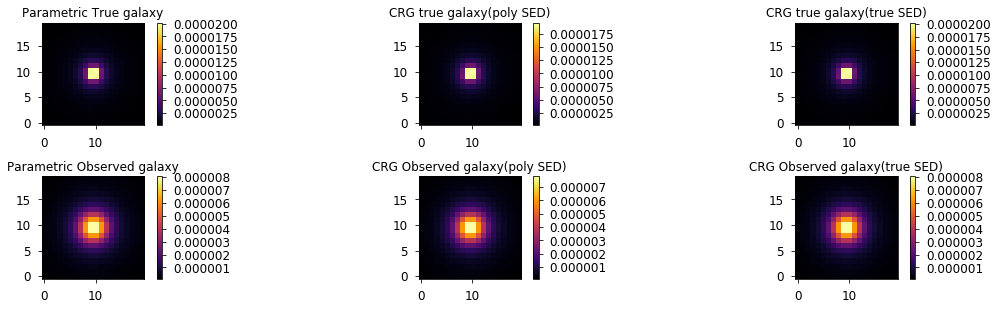

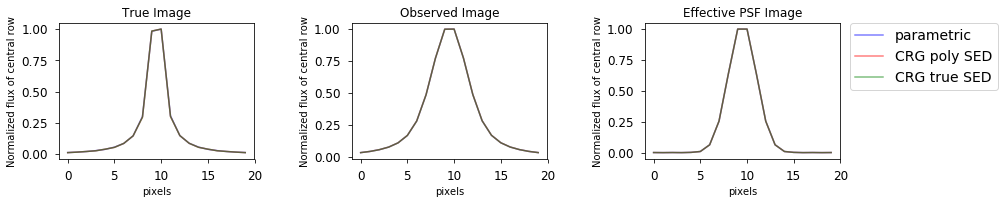

In [15]:
plt.figure(figsize=[18,16])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(6,3,1)
plt.imshow(true_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Parametric True galaxy')

plt.subplot(6,3,4)
plt.imshow(obs_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Parametric Observed galaxy')

plt.subplot(6,3,2)
plt.imshow(crg1_tru_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('CRG true galaxy(poly SED)')

plt.subplot(6,3,5)
plt.imshow(crg1_obs_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('CRG Observed galaxy(poly SED)')

plt.subplot(6,3,3)
plt.imshow(crg2_tru_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('CRG true galaxy(true SED)')
plt.subplot(6,3,6)
plt.imshow(crg2_obs_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('CRG Observed galaxy(true SED)')

plt.figure(figsize=[14,10])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
plt.plot(true_gal_im_r.array[10]/max(true_gal_im_r.array[10]), c='b',
         label='parametric', alpha=0.5)
plt.plot(crg1_true_gal_im_r.array[10]/max(crg1_true_gal_im_r.array[10]), c='r',
         label='CRG poly SED', alpha=0.5)
plt.plot(crg2_true_gal_im_r.array[10]/max(crg2_true_gal_im_r.array[10]), c='g',
         label='CRG true SED', alpha=0.5)
plt.title('True Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,2)
plt.plot(obs_gal_im_r.array[10]/max(obs_gal_im_r.array[10]), c='b',
         label='parametric', alpha=0.5)
plt.plot(crg1_obs_gal_im_r.array[10]/max(crg1_obs_gal_im_r.array[10]), c='r',
         label='CRG poly SED', alpha=0.5)
plt.plot(crg2_obs_gal_im_r.array[10]/max(crg2_obs_gal_im_r.array[10]), c='g',
         label='CRG true SED', alpha=0.5)
plt.title('Observed Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,3)
plt.plot(psf_r.image.array[10]/max(psf_r.image.array[10]), c='b',
         label='parametric', alpha=0.5)
plt.plot(crg1_psf_r.image.array[10]/max(crg1_psf_r.image.array[10]), c='r',
         label='CRG poly SED', alpha=0.5)
plt.plot(crg2_psf_r.image.array[10]/max(crg2_psf_r.image.array[10]), c='g',
         label='CRG true SED', alpha=0.5)
plt.title('Effective PSF Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## AEGIS Galaxy


In [16]:
in_filters = ['f606w', 'f814w']
file_filter_name = ['V', 'I']
rgc_path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/AEGIS_catalog_full/AEGIS_training_sample/'
rgc_cat_name = 'AEGIS_galaxy_catalog_filter_25.2.fits'
rgc = {}
for f, filt in enumerate(in_filters):
    name = rgc_cat_name.replace('filter', file_filter_name[f])
    rgc[filt] = galsim.RealGalaxyCatalog(name, dir=rgc_path)

(-0.5, 19.5, 19.5, -0.5)

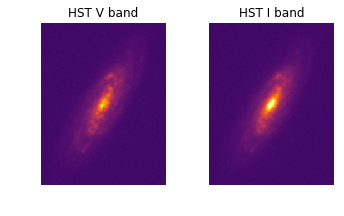

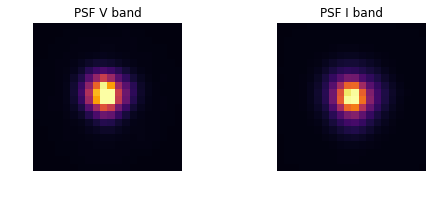

In [17]:
# display HST AEGIS galaxy

i=330
plt.figure(figsize=[6,6])
plt.subplots_adjust(hspace=0.01) 
plt.subplots_adjust(wspace = 0.01)
plt.subplot(2,2,1)
t = rgc['f606w'].getGalImage(i)
plt.imshow(t.array, cmap='inferno', vmax=0.4, vmin=-0.1)
plt.title('HST V band')
plt.xlim([50,250])
plt.ylim([66,327])
plt.axis('off')
plt.subplot(2,2,2)
t = rgc['f814w'].getGalImage(i)
plt.imshow(t.array, cmap='inferno', vmax=0.4, vmin=-0.1)
plt.title('HST I band')
plt.xlim([50,250])
plt.ylim([66,327])
plt.axis('off')


plt.figure(figsize=[8,6])
plt.subplot(2,2,1)
t = rgc['f606w'].getPSFImage(i)
plt.imshow(t.array, cmap='inferno', vmax=0.04, vmin=-0.001)
plt.title('PSF V band')
plt.axis('off')
plt.subplot(2,2,2)
t = rgc['f814w'].getPSFImage(i)
plt.imshow(t.array, cmap='inferno', vmax=0.04, vmin=-0.001)
plt.title('PSF I band')
plt.axis('off')


In [26]:

gal = galsim.ChromaticRealGalaxy([rgc['f606w'],rgc['f814w']], index=330)

In [27]:
in_p = cg_fn.LSST_Args()
filt_r = galsim.Bandpass('data/baseline/total_r.dat',
                       wave_type='nm').thin(rel_err=1e-4)
filt_i = galsim.Bandpass('data/baseline/total_i.dat',
                       wave_type='nm').thin(rel_err=1e-4)
in_p.b_SED, in_p.d_SED, in_p.c_SED = cg_fn.get_template_seds(in_p)

psf_args = cg_fn.psf_params()
PSF =  cg_fn.get_gaussian_PSF(psf_args)
con = galsim.Convolve([gal, PSF])

true_gal_im_r = gal.drawImage(filt_r, scale=0.2,
                             nx=int(200*0.03/0.2), ny=int(260*0.03/0.2))
true_gal_im_i = gal.drawImage(filt_i, scale=0.2,
                             nx=int(200*0.03/0.2), ny=int(260*0.03/0.2))

obs_gal_im_r = con.drawImage(filt_r, scale=0.2,
                            nx=int(200*0.03/0.2), ny=int(260*0.03/0.2))
obs_gal_im_i = con.drawImage(filt_i, scale=0.2,
                            nx=int(200*0.03/0.2), ny=int(260*0.03/0.2))

psf_r = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_r,
                          scale=0.2, nx=20, ny=20)
psf_i = cg_fn.get_eff_psf(PSF, in_p.c_SED, filt_i,
                          scale=0.2, nx=20, ny=20)

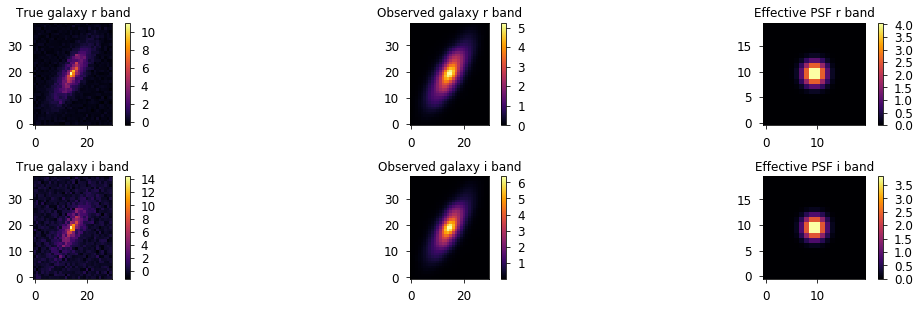

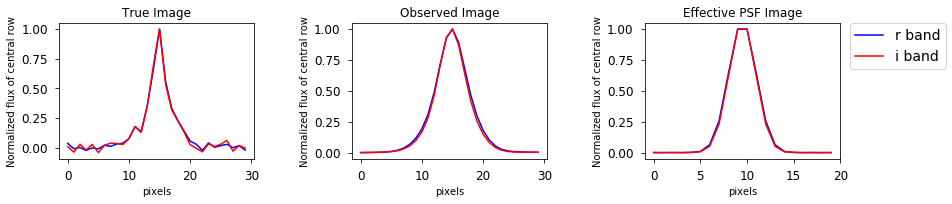

In [32]:
plt.figure(figsize=[18,16])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(6,3,1)
plt.imshow(true_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('True galaxy r band')
plt.subplot(6,3,4)
plt.imshow(true_gal_im_i.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('True galaxy i band')

plt.subplot(6,3,2)
plt.imshow(obs_gal_im_r.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Observed galaxy r band')
plt.subplot(6,3,5)
plt.imshow(obs_gal_im_i.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Observed galaxy i band')

plt.subplot(6,3,3)
plt.imshow(psf_r.image.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Effective PSF r band')
plt.subplot(6,3,6)
plt.imshow(psf_i.image.array, cmap='inferno',
           origin='left', interpolation='none')
plt.colorbar()
plt.title('Effective PSF i band')

plt.figure(figsize=[14,10])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3,3,1)
plt.plot(true_gal_im_r.array[20]/max(true_gal_im_r.array[20]), c='b',
         label='r band')
plt.plot(true_gal_im_i.array[20]/max(true_gal_im_i.array[20]), c='r',
         label='i band')
plt.title('True Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,2)
plt.plot(obs_gal_im_r.array[20]/max(obs_gal_im_r.array[20]), c='b',
         label='r band')
plt.plot(obs_gal_im_i.array[20]/max(obs_gal_im_i.array[20]), c='r',
         label='i band')
plt.title('Observed Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')

plt.subplot(3,3,3)
plt.plot(psf_r.image.array[10]/max(psf_r.image.array[10]), c='b',
         label='r band')
plt.plot(psf_i.image.array[10]/max(psf_i.image.array[10]), c='r',
         label='i band')
plt.title('Effective PSF Image')
plt.xlabel('pixels')
plt.ylabel('Normalized flux of central row')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)